In [439]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [353]:
loan = pd.read_csv('Default_Fin_1.csv')

In [354]:
loan

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [245]:
loan.isna().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [246]:
loan.dtypes

Index              int64
Employed           int64
Bank Balance     float64
Annual Salary    float64
Defaulted?         int64
dtype: object

In [247]:
loan.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [248]:
loan['Defaulted?'].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

<AxesSubplot:xlabel='Annual Salary', ylabel='Count'>

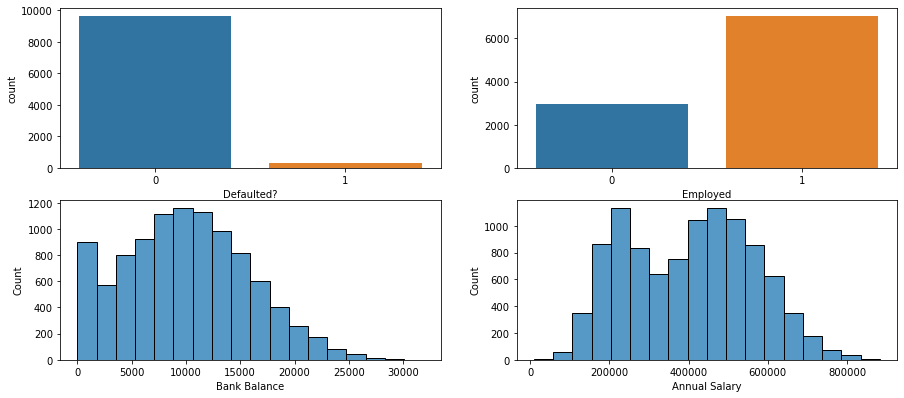

In [249]:

plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
sns.countplot('Defaulted?',data=loan)

plt.subplot(3,2,2)
sns.countplot('Employed',data=loan)

plt.subplot(3,2,3)
sns.histplot(data=loan,x = 'Bank Balance',bins=18)


plt.subplot(3,2,4)
sns.histplot(data=loan,x = 'Annual Salary',bins=18)




<AxesSubplot:>

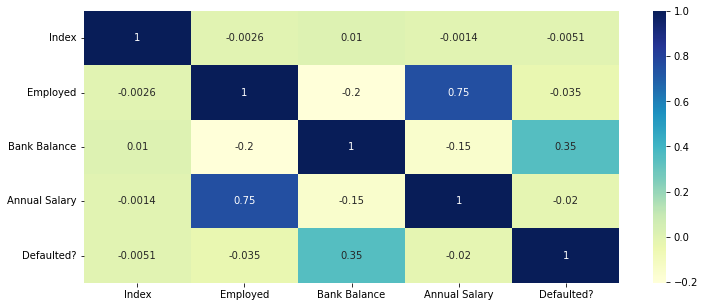

In [463]:
plt.figure(figsize=(12,5))
sns.heatmap(loan.corr(),annot=True,cmap="YlGnBu")

In [251]:
y = loan['Defaulted?']
X = loan.drop(['Index','Defaulted?'],axis=1)

In [416]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.9, random_state=107)

In [417]:
log = LogisticRegression()

In [418]:
log.fit(X_train,y_train)

LogisticRegression()

In [429]:
print('Model Score is ',log.score(X_test,y_test))

Model Score is  0.9656666666666667


In [442]:
print(classification_report(y_test,log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8695
           1       0.00      0.00      0.00       305

    accuracy                           0.97      9000
   macro avg       0.48      0.50      0.49      9000
weighted avg       0.93      0.97      0.95      9000



Text(33.0, 0.5, 'Actual')

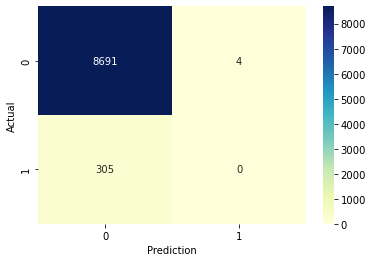

In [462]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,log.predict(X_test))),annot=True,cmap="YlGnBu",fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [434]:
# sample employee data 
#USER1 have  a job and he/she annual salary is $240,900 . 
user1 = pd.DataFrame({'Employed':1,'Bank Balance':100,'Annual Salary':240900},index=[0])

#USER2 doesn't have a job but he/she have $600,000 in bank acount .
user2 = pd.DataFrame({'Employed':0,'Bank Balance':600000,'Annual Salary':0},index=[0])

In [435]:
#Predict the default with sample 
#0 mean can't default 
#1 mean default 
print('User1 values is  ', log.predict(user1))

User1 values is   [0]


In [436]:
#Predict the default with sample 
#0 mean can't default 
#1 mean default 
print('User2 values is !!!HIGH RISK ', log.predict(user2))

User2 values is !!!HIGH RISK  [1]
